[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/tree/viktorme/Lab-4/lab4_approximation.ipynb)
# Lab 4: Approximation #
**Viktor Meyer - DD2363 Methods in Scientific Computing**

# **Abstract**
This lab is an exercise in approximation methods. The mandatory part includes L2 projection to piece-wise linear approximation over mesh in 1D. There is also an extra assignment L2 projection to piece-wise linear approximation over triangular mesh in 2D.

# **Environment**
To have access to the neccessary modules you have to run this cell.

In [208]:
# Load neccessary modules.

import numpy as np
import scipy.integrate as integrate
import math

from matplotlib import pyplot as plt

# **Introduction**
The methods to be implemented were covered in the during lectures and definitions are available in the lecture notes. The aim of this lab is to approach the problem of solving systems of linear equations using approximation. This may be of use when e.g solutions do not exist and we seek a best possible solution or are constrained by computational work/memory footprint.  
> LN-DD2363-part5.pdf, p. 161

# **Methods**

### L2 projection ###

> LN-DD2363-part5.pdf, pp. 167-171

In [209]:
def l2(f, x):
    
    n = x.size
    a = np.zeros(shape=(n,n))
    b = np.zeros(n)
    
    for i in range(1, n):
        
        # build mass matrix
        
        h = x[i] - x[i - 1]
        
        # a_{i, i} = h_{i}/3
        a[i, i] += h/3
        
        # a_{i, i} = h_{i+1}/3 
        a[i - 1, i - 1] += h/3
        
        # a_{i, i+1} = h_{i+1}/6 
        a[i - 1, i] += h/6
        
        # a_{i, i-1} = h_{i}/6 
        a[i, i - 1] += h/6
        
        # build load vector
        
        l = x[i-1]
        c = x[i]
        r = x[i+1 if i+1 < n else i]
        b[i] += integrate.quad(lambda x: (f(x)*((x-l)/h)), l, c)[0]
        b[i] += integrate.quad(lambda x: (f(x)*((r-x)/h)), c, r)[0]
    
    return np.linalg.solve(a,b)

# **Results**

### Convergence and Accuracy###
We check that the error converges towards zero as the number of nodes increases. This test also ensures that accuracy is sufficient since we evaluate the real function value at each point and compare it to the approximation

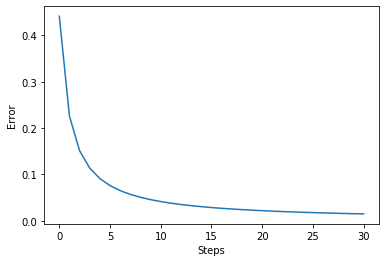

In [210]:
    f = lambda x : math.sin(x)
    errs = np.array([])
    steps = np.array([1/x for x in range(1, iterations)])
    
    for i in range(steps.size):

      points = np.arange(0, 2*math.pi, steps[i])
      apx = l2(f, points)
      
      err = 0
      for j in range(points.size): err += apx[j]-f(points[j])
      errs = np.append(errs, np.abs(err))

    plt.plot(errs)
    plt.xlabel("Steps")
    plt.ylabel("Error")
    plt.show()
    

# **Discussion**

This lab showed that approximation methods can yield tight solutions. With many iteration points the approximation error quickly approaches zero when compared to the actual function value.